## Problem:

Consider an urn consisting of 100 balls. Suppose half of these balls are red, and half are black.  
You are to randomly pick 5 balls from the urn. Let X be the number of red balls in such a sample. 
Then X has a hyper-geometric distribution with pmf:  
$$ f(x)=\frac{ C(50,x) \cdot C(50, (5-x))}{C(100,5)} $$

1. Simulate this sampling experiment 1,000 times.
2. Produce a relative frequency histogram of X
3. Compare the actual observed values of X with the theoretical frequency obtained from equation above by plotting the theoretical frequency in the same figure as the simulation results.

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import random

from scipy import stats

In [97]:
ngood, nbad, nsamp, nsim = 50, 50, 5, 100
s = np.random.hypergeometric(ngood, nbad, nsamp, nsim)
s

array([1, 2, 4, 4, 2, 2, 3, 1, 3, 5, 3, 4, 2, 3, 3, 3, 3, 5, 1, 2, 2, 3,
       1, 2, 4, 4, 4, 1, 4, 2, 3, 3, 4, 3, 3, 2, 1, 4, 2, 4, 3, 3, 4, 4,
       2, 3, 1, 4, 2, 2, 5, 4, 2, 2, 1, 1, 2, 4, 5, 2, 2, 2, 3, 2, 3, 2,
       2, 4, 3, 3, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2,
       2, 4, 4, 4, 1, 4, 3, 3, 4, 3, 1, 2])

In [98]:
s = []
for i in range(nsim):
    population = [True] * ngood + [False] * nbad
    random.shuffle(population)
    s.append(sum(population[:nsamp]))
np.array(s)

array([2, 3, 3, 3, 2, 1, 4, 1, 2, 2, 4, 2, 4, 2, 5, 4, 2, 0, 3, 4, 1, 3,
       2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 4, 1, 4, 2, 4, 3, 2, 4, 3, 1,
       1, 2, 2, 3, 4, 3, 2, 2, 3, 4, 3, 3, 4, 4, 3, 2, 2, 2, 3, 0, 2, 2,
       4, 1, 2, 2, 4, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3,
       2, 2, 4, 2, 2, 3, 3, 0, 2, 3, 4, 2])

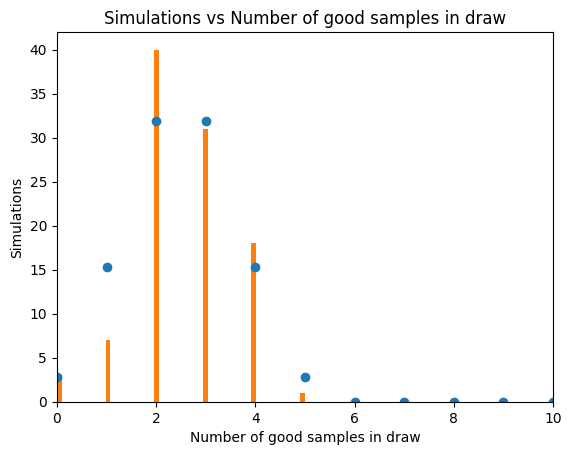

In [99]:
rv = stats.hypergeom(ngood + nbad, ngood, nsamp)
x = np.arange(0, ngood + 1)
pmf = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, pmf * nsim, 'o')
n, bins, patches = plt.hist(s, bins=(ngood + 1))
ax.set_xlim([0, 10])
ax.set_xlabel('Number of good samples in draw')
ax.set_ylabel('Simulations')
ax.set_title('Simulations vs Number of good samples in draw')
plt.show()